In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [3]:
train = pd.read_csv(r"trainset.csv")
test = pd.read_csv(r"testset.csv")

In [4]:
train.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,357.385559,361.151062,355.959839,359.288177,359.288177,5115500
1,2013-01-03,360.122742,363.600128,358.031342,359.496826,359.496826,4666500
2,2013-01-04,362.313507,368.339294,361.488861,366.600616,366.600616,5562800


In [5]:
training_set = train.iloc[:, 1:2].values

In [6]:
training_set

array([[ 357.385559],
       [ 360.122742],
       [ 362.313507],
       ...,
       [1057.390015],
       [1051.599976],
       [1046.719971]])

In [7]:
training_set.shape

(1259, 1)

In [8]:
train.tail(3)

,Date,Open,High,Low,Close,Adj Close,Volume
1256,2017-12-27,1057.390015,1058.369995,1048.050049,1049.369995,1049.369995,1271900
1257,2017-12-28,1051.599976,1054.750000,1044.770020,1048.140015,1048.140015,837100
1258,2017-12-29,1046.719971,1049.699951,1044.900024,1046.400024,1046.400024,887500


In [9]:
# FEATURE SCALING
#MinMaxScaler

In [10]:
train.shape

(1259, 7)

In [11]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [12]:
training_set_scaled

array([[0.01011148],
       [0.01388614],
       [0.01690727],
       ...,
       [0.97543954],
       [0.9674549 ],
       [0.96072522]])

In [13]:
# CREATING A DATA STRUCTURE WITH 60 TIMESTEPS AND ONE OUTPUT

In [14]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [15]:
X_train.shape

(1198, 60)

In [16]:
y_train.shape

(1198,)

In [17]:
# RESHAPING

In [18]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [19]:
X_train.shape

(1198, 60, 1)

In [20]:
# Building the RNN by Importing all
#initializing the RNN

In [21]:
regressor = Sequential()

In [22]:
# Adding the first LSTM layer and some Dropout regularisation

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [23]:
# Adding a second LSTM layer and some Dropout regularisation

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [24]:
# Adding a third LSTM layer and some Dropout regularisation

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [25]:
# Adding a fourth LSTM layer and some Dropout regularisation

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [26]:
# Adding the output layer

regressor.add(Dense(units = 1))

In [27]:
# compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
1198/1198 [==============================] - 19s 16ms/step - loss: 0.0305
Epoch 2/100
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0050
Epoch 3/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0040
Epoch 4/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0039
Epoch 5/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0038
Epoch 6/100
1198/1198 [==============================] - 10s 9ms/step - loss: 0.0034
Epoch 7/100
1198/1198 [==============================] - 10s 9ms/step - loss: 0.0033
Epoch 8/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0030
Epoch 9/100
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0028
Epoch 10/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0030
Epoch 11/100
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0031
Epoch 12/100
1198/

1198/1198 [==============================] - 9s 7ms/step - loss: 9.7105e-04
Epoch 94/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0011
Epoch 95/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0010
Epoch 96/100
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0011
Epoch 97/100
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0011
Epoch 98/100
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0011
Epoch 99/100
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0010
Epoch 100/100
1198/1198 [==============================] - 10s 9ms/step - loss: 0.0010


In [28]:
# Making the Predictions and Visualisation of data

In [29]:
real_stock_price = test.iloc[:, 1:2].values

In [30]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((train['Open'], test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(test) - 60:].values

In [31]:
inputs.shape

(185,)

In [32]:
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [33]:
inputs.shape

(185, 1)

In [34]:
X_test = []

In [35]:
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)

In [36]:
X_test.shape

(20, 60)

In [37]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test.shape

(20, 60, 1)

In [38]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [39]:
predicted_stock_price

array([[1073.6365],
       [1071.9894],
       [1073.7826],
       [1081.3894],
       [1092.041 ],
       [1102.6433],
       [1111.4666],
       [1115.418 ],
       [1116.7202],
       [1116.4862],
       [1120.3555],
       [1126.2124],
       [1132.269 ],
       [1137.0858],
       [1141.0282],
       [1147.348 ],
       [1157.169 ],
       [1166.4487],
       [1173.1567],
       [1177.192 ]], dtype=float32)

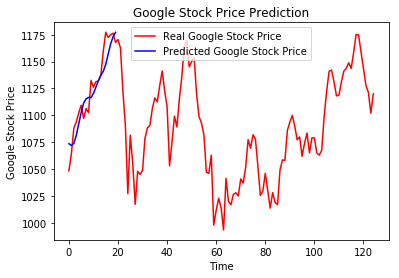

In [40]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()